<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [ ]:
pip install imblearn --user

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as st
import statsmodels as sm
import matplotlib
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
import io
import requests
import ssl
import pandas as pd
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**1. Загрузить датасет**

**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
dataset['num_nulls'] = dataset.isnull().sum(axis=1)
dataset[dataset['num_nulls'] > 0].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,num_nulls


**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [4]:
len(dataset)

284807

In [5]:
dataset_class0 = dataset[dataset['Class'] == 0]
len(dataset_class0)

284315

In [6]:
dataset_class1 = dataset[dataset['Class'] == 1]
len(dataset_class1)

492

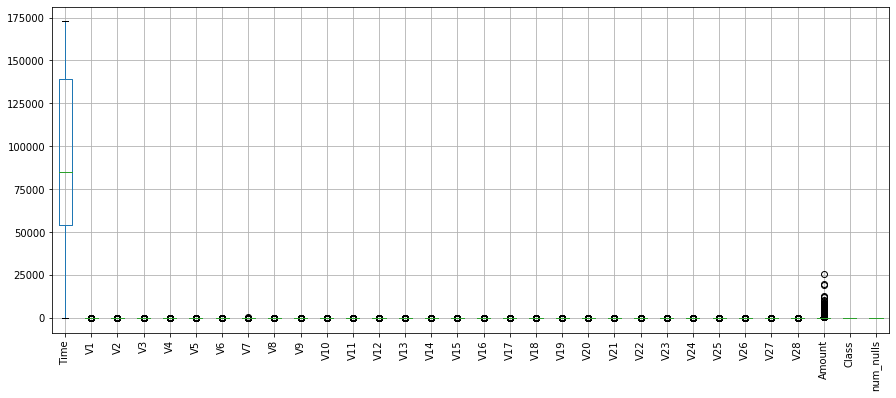

In [7]:
dataset_class0.boxplot(figsize=(15,6), rot=90)

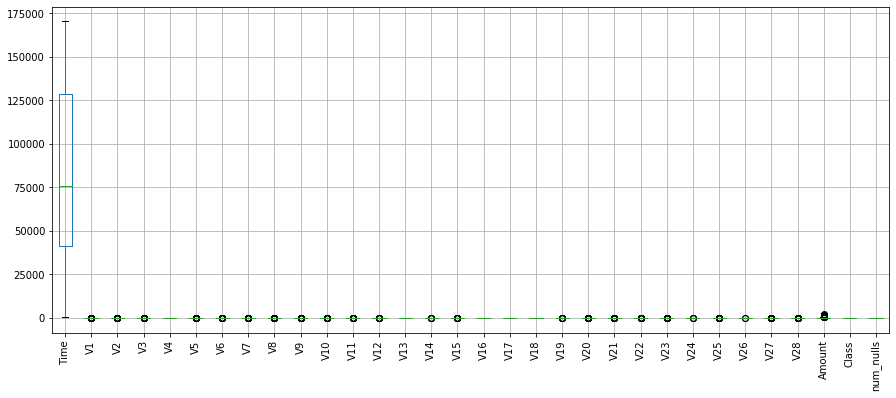

In [8]:
dataset_class1.boxplot(figsize=(15,6), rot=90)

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [9]:
dataset_class1.Amount.sum()

60127.97

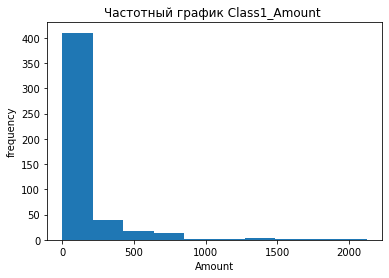

In [10]:
n, bins, patches = plt.hist(dataset_class1['Amount'])
plt.xlabel('Amount')
plt.ylabel('frequency')
plt.title('Частотный график Class1_Amount ')
plt.show()

In [11]:
dataset_class0.Amount.sum()

25102462.04

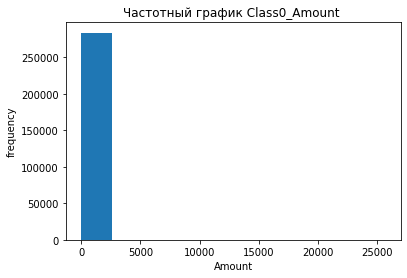

In [12]:
n, bins, patches = plt.hist(dataset_class0['Amount'])
plt.xlabel('Amount')
plt.ylabel('frequency')
plt.title('Частотный график Class0_Amount ')
plt.show()

**5. Построить графики histograms для всех значений**

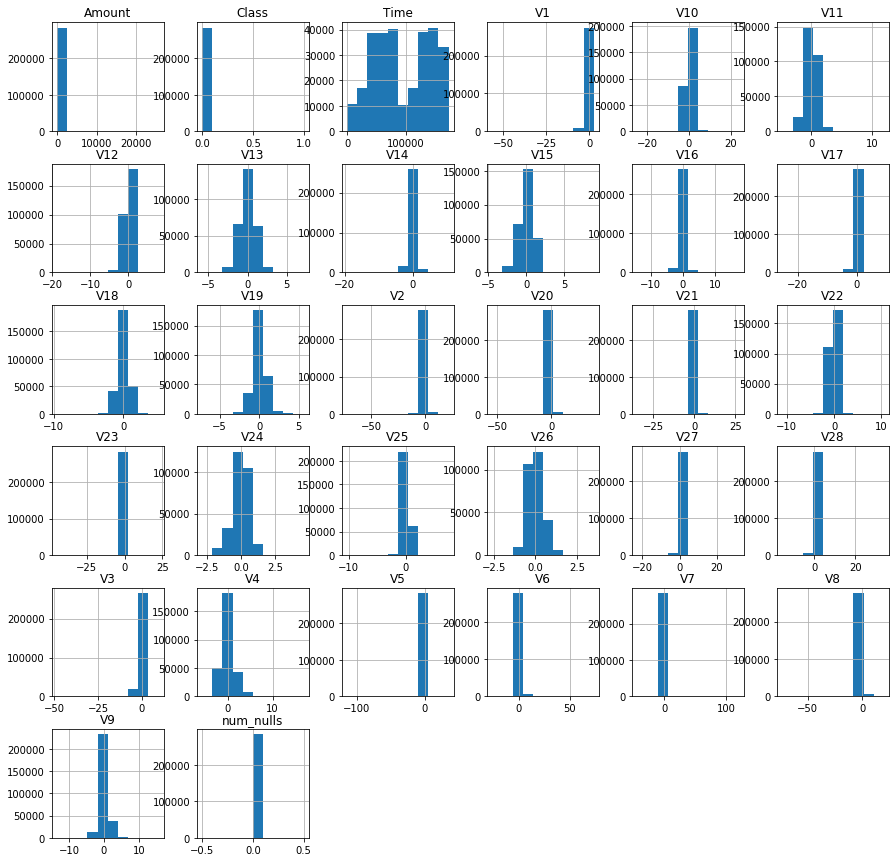

In [13]:
dataset.hist(figsize=(15,15))
plt.show()

**6. Построить матрицу корреляций для всех значений**

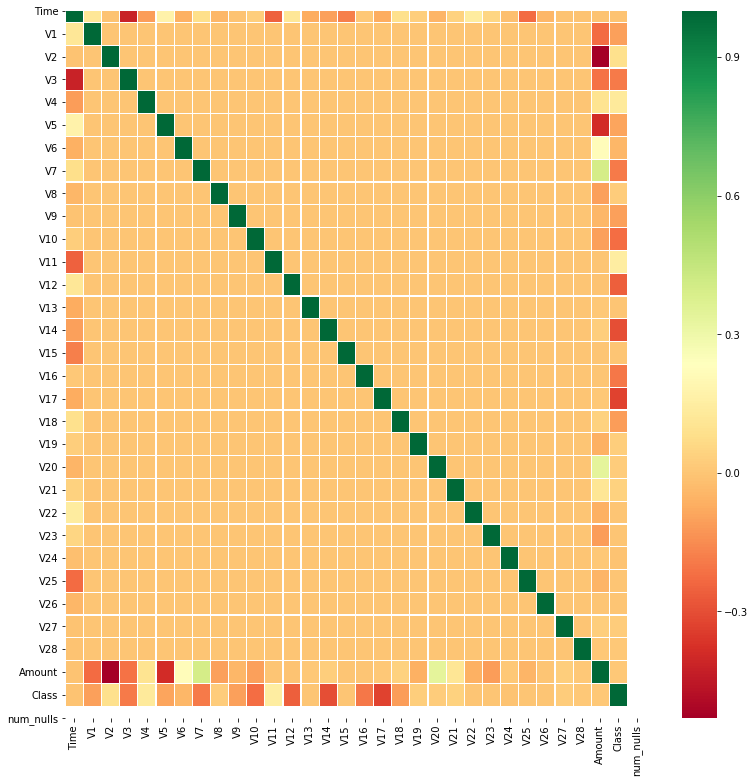

In [14]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(dataset.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

Модель Random Forest

In [67]:
output_y = dataset['Class']
input_x = dataset.iloc[:,:29]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.2)

In [69]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Как делать classification report:

In [71]:
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))
model.score(X_test, y_test)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.97      0.75      0.85       100

    accuracy                           1.00     56962
   macro avg       0.99      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



0.9995259997893332

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?** Результаты практически одинаковые, нормализовывать данные не нужно

In [61]:
data_norm = dataset.iloc[:,:29]
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
np_scaled = min_max_scaler.fit_transform(data_norm)
df_norm = pd.DataFrame(np_scaled)


In [62]:
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_norm, output_y, test_size=0.2)

In [63]:
y_test_22.head()

194275    0
54407     0
254848    0
121546    0
242845    0
Name: Class, dtype: int64

In [64]:
input_norm = data_norm

In [73]:
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_norm, output_y, test_size=0.2)
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train_22,y_train_22)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
model_pred = model.predict(X_test_22)
print(classification_report(y_test_22, model_pred))
model.score(X_test_22, y_test_22)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.94      0.79      0.86       113

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



0.9994733330992591

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

In [75]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)